#### ВВодный спич: я смотрел вебинар Анатолия по этой теме, где он ясно дал понять, что нет универсальной схемы, помогающей выбрать нужный метод (чем меня расстроил) и что следует внимательно изучать данные перед выбором какого-либо теста, например АА тестами (как и что это, я пока не понял)

### Задача понять стали ли мы больше зарабатывать с пользователя или нет
### H0- не стали
### H1- Стали

In [51]:
import pandas as pd
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
import pingouin as pg

import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

from tqdm.auto import tqdm

plt.style.use('ggplot')

In [15]:
csv = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-potapejko/apotapeiko/Stat/Lesson_9_st/hw_bootstrap.csv',
                  decimal = ",", sep=";")

In [27]:
def get_bootstrap(
    data_column_1, # числовые значения первой выборки
    data_column_2, # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_data = []
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            len(data_column_1), 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            len(data_column_1), 
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1)-statistic(samples_2)) # mean() - применяем статистику
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    quants = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    _, _, bars = plt.hist(pd_boot_data[0], bins = 50)
    for bar in bars:
        if bar.get_x() <= quants.iloc[0][0] or bar.get_x() >= quants.iloc[1][0]:
            bar.set_facecolor('red')
        else: 
            bar.set_facecolor('grey')
            bar.set_edgecolor('black')
    
    plt.style.use('ggplot')
    plt.vlines(quants,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "quants": quants, 
            "p_value": p_value}

In [28]:
#Для удобства запишем в переменные
A = csv[csv.experimentVariant == 'Control'].value
B = csv[csv.experimentVariant == 'Treatment'].value

In [33]:
#Посчитаем количество наблюдей в первой группе
csv[csv.experimentVariant == 'Control'].value.count()

500

In [34]:
#И во второй
csv[csv.experimentVariant == 'Treatment'].value.count()

500

In [53]:
A.std()

0.9793773878665696

In [54]:
B.std()

186.55701125985144

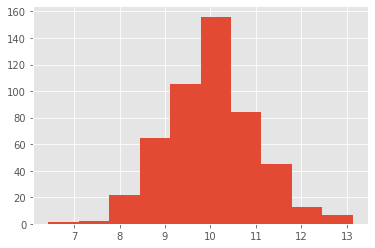

In [52]:
#Проверим нормальность распределения в графиках
A.hist()

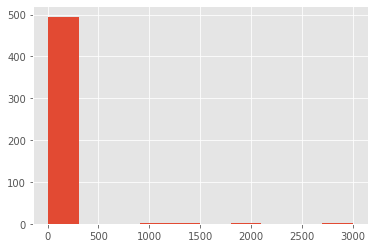

In [48]:
B.hist()

#### Во второй группе на графике видно, что данные распределены не нормально, что не подходит для Т-Теста (Но Анатолий в леции говорил, что есть разные НО и надо изучать данные отдельно)

In [38]:
#Проверим нормальность с помощью Шапиро, т.к. наблюдений менее 5000, а значит не должно быть проблем
pg.normality(data=csv, dv='value', group='experimentVariant')

,W,pval,normal
Control,0.995925,2.241637e-01,True
Treatment,0.070389,1.093013e-43,False


#### По итогу исследования делаем вывод, что Т-тест не подходит и следует применить бутстрэп или Мана-Уитни (т.к. Непараметрический U-критерий Манна -Уитни не столь чувствителен к наличию выбросов по сравнению с t-тестом)

In [29]:
mannwhitneyu(A, B)

MannwhitneyuResult(statistic=124189.5, pvalue=0.8592148582485579)

#### Тест Манна-Уитни проранжировал нам данные и помог игнорировать выбросы. По результату теста мы отвергаем H1 и принимаем H0- мы НЕ стали зарабатывать больше с пользователя

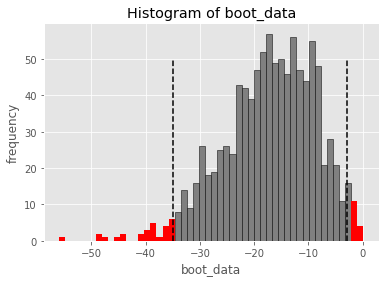

{'boot_data': [-23.95289534941572,
  -9.299362162548725,
  -13.037187648899256,
  -20.221717119188746,
  -15.295134863092915,
  -16.51775288365989,
  -21.33185954526506,
  -30.110539557730668,
  -25.44496092803814,
  -21.202534211073488,
  -15.057985355814173,
  -1.998152433556994,
  -14.873847203268182,
  -27.159283379760737,
  -25.373251561622475,
  -10.896325934328912,
  -5.34817309357949,
  -9.918782419307579,
  -13.38251213223023,
  -11.40819298060141,
  -16.911031123461335,
  -16.26851223765731,
  -15.70846146555289,
  -25.293759112125787,
  -4.061164600467954,
  -30.251150729025596,
  -6.015036944345347,
  -16.023681456269806,
  -26.136842691084816,
  -10.973561088660617,
  -14.906034700414635,
  -14.435627031320037,
  -7.320402263165491,
  -14.270773994734014,
  -25.103816633113883,
  -9.935326969464025,
  -11.355526828710694,
  -7.246515154970011,
  -35.135113377923616,
  -10.206827677371752,
  -9.344062212625598,
  -13.491333344511558,
  -20.0216883002956,
  -9.03276236715003

In [31]:
get_bootstrap(A, B)

#### Бутстрап с текущими настройками сравнивает средние, поэтому не удивительно, что с выбросами в группе мы получили P сильно отличающийся от результатов в тесте MW. Поэтому изменим подсчет среднего на медианное и повторим тест

In [56]:
def get_bootstrap_median(
    data_column_1, # числовые значения первой выборки
    data_column_2, # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.median, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_data = []
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            len(data_column_1), 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            len(data_column_1), 
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1)-statistic(samples_2)) 
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    quants = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.median(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.median(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    _, _, bars = plt.hist(pd_boot_data[0], bins = 50)
    for bar in bars:
        if bar.get_x() <= quants.iloc[0][0] or bar.get_x() >= quants.iloc[1][0]:
            bar.set_facecolor('red')
        else: 
            bar.set_facecolor('grey')
            bar.set_edgecolor('black')
    
    plt.style.use('ggplot')
    plt.vlines(quants,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "quants": quants, 
            "p_value": p_value}

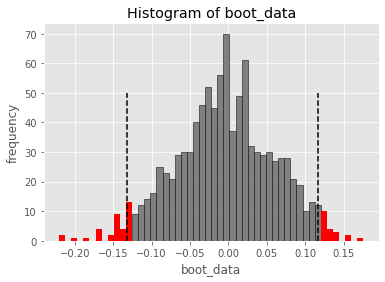

{'boot_data': [0.045595521775339876,
  0.005912592360848734,
  -0.012202181258288647,
  0.0182583283879012,
  0.035377853871500164,
  -0.00997939401665171,
  -0.04954757667774068,
  -0.053877402763301774,
  -0.03379056621755083,
  0.0514902356208502,
  0.0360312733124033,
  0.06728397906329775,
  0.11367390442201675,
  -0.11114617996584464,
  -0.09053987978040112,
  0.0465226003867496,
  0.10738157860910036,
  -0.10973717415560102,
  0.024069949778500188,
  -0.03330698109300023,
  -0.09913350043497005,
  0.07295288110244869,
  0.001205270705600725,
  -0.13250265860826893,
  -0.032182658565050204,
  -0.14271215647011282,
  -0.03460582485660346,
  -0.06849959612319978,
  0.0756567191077302,
  0.0,
  -0.11883503714483012,
  -0.02438131127379961,
  0.10337199195210012,
  0.0644053317542177,
  0.08997252004036049,
  -0.14860227542273208,
  -0.09216063912085204,
  0.06661644413177292,
  -0.010536899366199393,
  -0.0797957618760492,
  -0.03821663005660092,
  0.0066154181423492275,
  -0.080163

In [57]:
get_bootstrap_median(A, B)

## По итогу бутстрэп выдал результаты позволяющие также отвергнуть H1- мы не стали зарабатывать больше